## Projekat 1: Procena stepena gojaznosti - klasifikacija

>Class attribute: NObeyesdad

In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [704]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

### Load dataset

In [371]:
data = pd.read_csv("data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


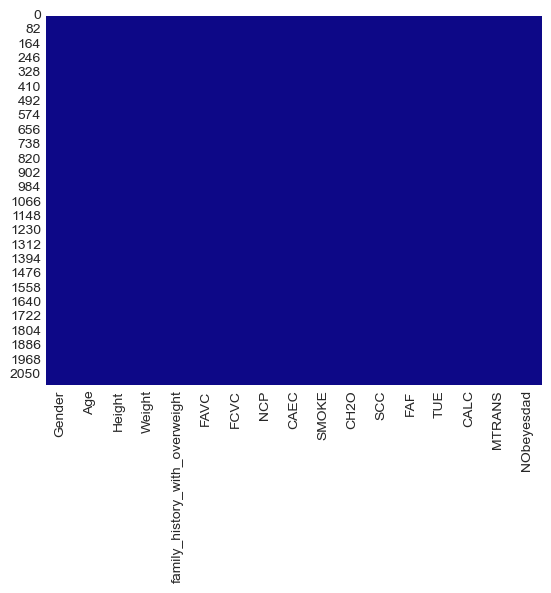

In [6]:
sns.heatmap(data.isna(), cbar=False, cmap='plasma')
plt.show()

In [7]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 24


In [9]:
data[data.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [374]:
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


### Explore features

In [287]:
numerical_features = ['Age', 'Height', 'Weight']
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
already_encoded_ordinal_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
ordinal_features_to_encode = ['CAEC', 'CALC']
nominal_features_to_encode = ["MTRANS"]
class_feature = "NObeyesdad"
class_names = ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']

In [373]:
data["Age"] = data["Age"].astype(int)

In [13]:
data[numerical_features].describe()

,Age,Height,Weight
count,2087.000000,2087.000000,2087.000000
mean,24.009104,1.702674,86.858730
std,6.333297,0.093186,26.190847
min,14.000000,1.450000,39.000000
25%,19.000000,1.630178,66.000000
50%,22.000000,1.701584,83.101100
75%,26.000000,1.769491,108.015907
max,61.000000,1.980000,173.000000


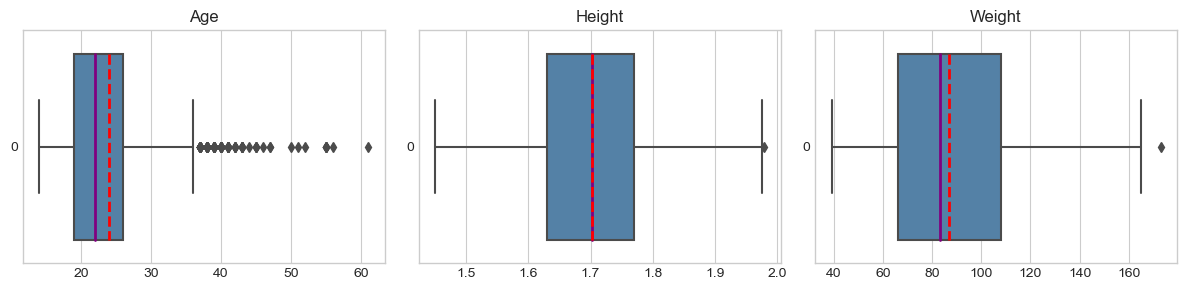

In [445]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    plt.title(feature)
    sns.boxplot(data[feature], orient='h', color="steelblue", showmeans=True, meanline=True,
                    medianprops={'linewidth': 2, 'color': 'purple'},
                    meanprops={'linewidth': 2, 'color': 'red'})

plt.tight_layout()

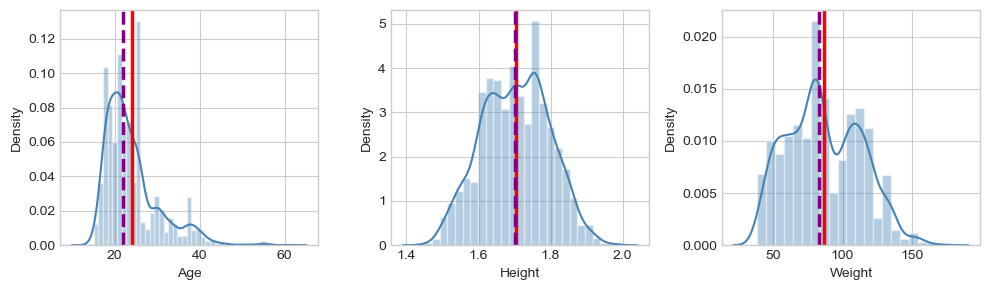

In [442]:
plt.figure(figsize=(10, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.distplot(data[feature], color="steelblue")
    plt.axvline(x=data[feature].mean(), c='red', ls='-', lw=2.5)
    plt.axvline(x=data[feature].median(), c='purple', ls='--', lw=2.5)

plt.tight_layout()

In [16]:
data[numerical_features].skew()

Age       1.547297
Height   -0.024743
Weight    0.241902
dtype: float64

In [17]:
data[numerical_features].corr()

,Age,Height,Weight
Age,1.000000,-0.036012,0.186240
Height,-0.036012,1.000000,0.457468
Weight,0.186240,0.457468,1.000000


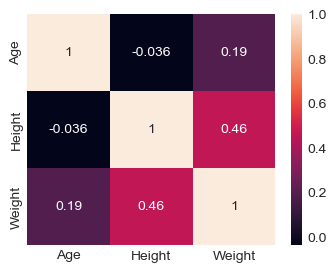

In [18]:
plt.figure(figsize=(4,3))

sns.heatmap(data[numerical_features].corr(), annot = True)

plt.show()

In [19]:
data.mode()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,21,1.7,80.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_I


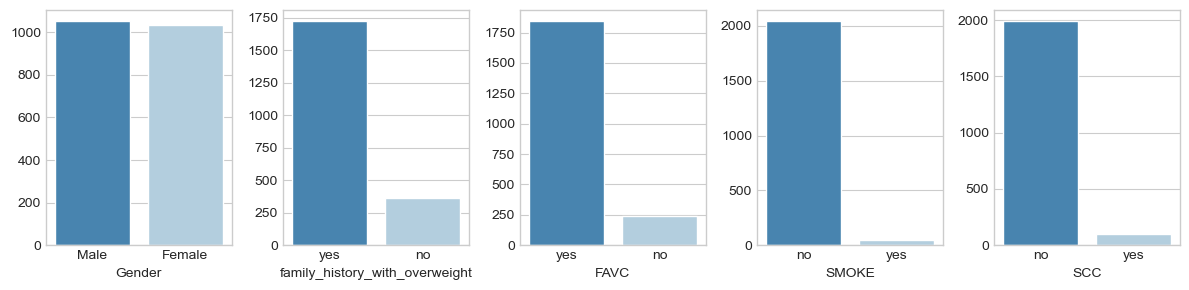

In [20]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(binary_features):
    plt.subplot(1, 5, i+1)
    counts = data[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

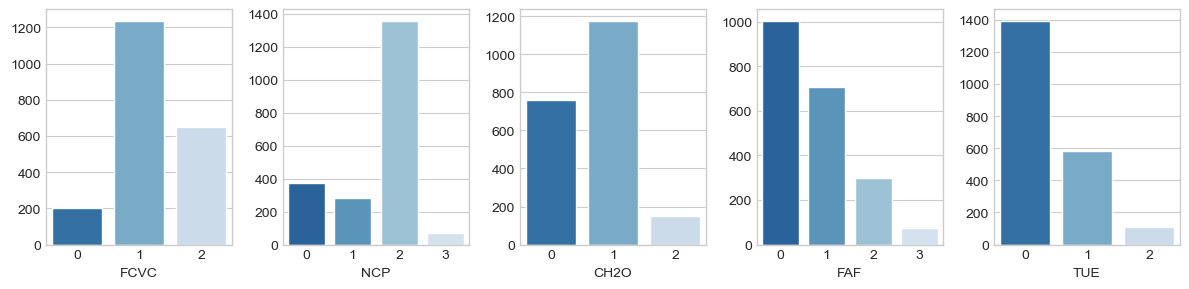

In [375]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(already_encoded_ordinal_features):
    data[feature] = data[feature].astype(int)
    min_val = min(data[feature])
    if min_val == 1: 
        data[feature] = data[feature] - 1

    plt.subplot(1, 5, i+1)
    counts = data[feature].value_counts()
    plt.xticks(counts.index)
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

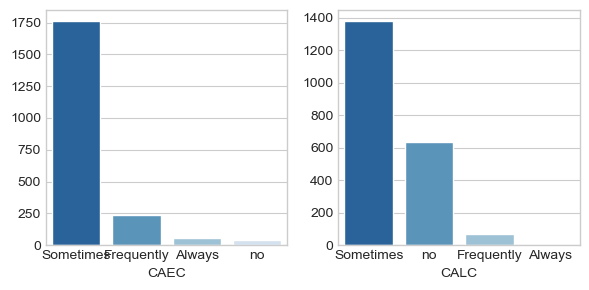

In [9]:
plt.figure(figsize=(6, 3))

for i, feature in enumerate(ordinal_features_to_encode):
    plt.subplot(1, 2, i+1)
    counts = data[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

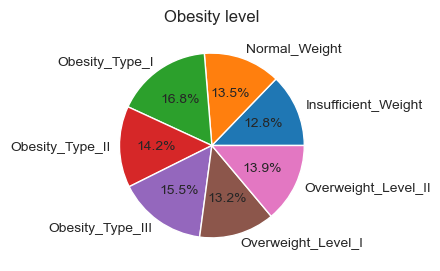

In [47]:
plt.figure(figsize=(6, 3))

plt.title("Obesity level")
data.groupby("NObeyesdad").size().plot(kind='pie', autopct='%1.1f%%')

plt.show()

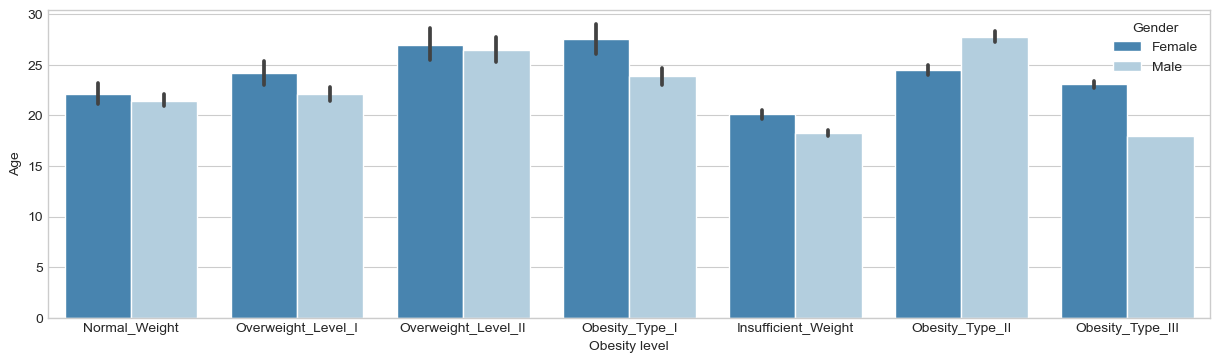

In [23]:
fig = plt.figure(figsize = (15, 4))

sns.barplot(x="NObeyesdad", y="Age", hue="Gender", data=data, palette="Blues_r")
plt.xlabel("Obesity level")
plt.ylabel("Age")

plt.show()

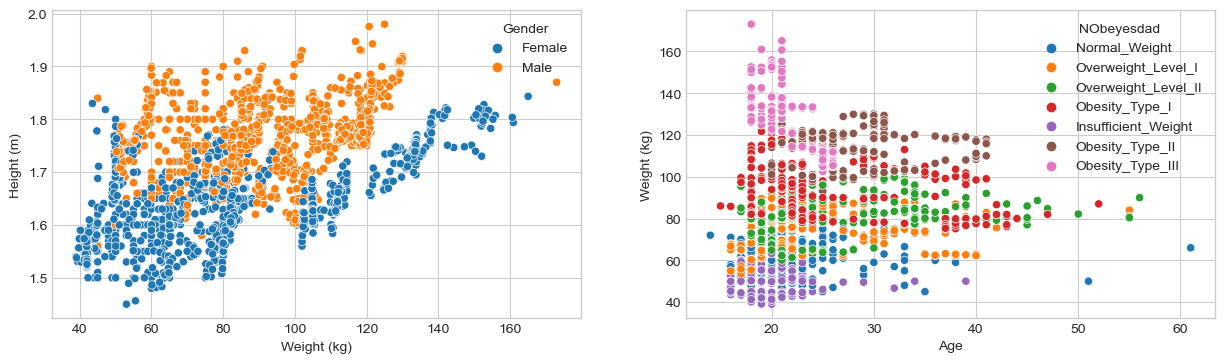

In [24]:
fig = plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Weight", y="Height", hue="Gender", data=data)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.subplot(1, 2, 2)
sns.scatterplot(x="Age", y="Weight", hue="NObeyesdad", data=data)
plt.xlabel("Age")
plt.ylabel("Weight (kg)")

plt.show()

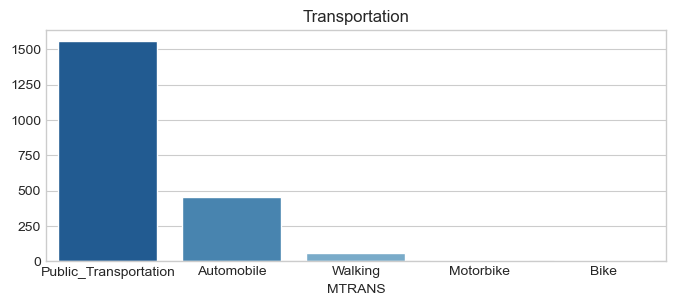

In [25]:
plt.figure(figsize=(8, 3))

plt.title("Transportation")
counts = data["MTRANS"].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.show()

### Encode features

In [376]:
enc = OrdinalEncoder()
data[ordinal_features_to_encode] = enc.fit_transform(data[ordinal_features_to_encode])
data[ordinal_features_to_encode] = data[ordinal_features_to_encode].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int32  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   int32  
 7   NCP                             2087 non-null   int32  
 8   CAEC                            2087 non-null   int32  
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   int32  
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [377]:
# OneHotEncoder(drop='if_binary')
features_for_one_hot_encoding = binary_features + nominal_features_to_encode
transformer = ColumnTransformer([("", OneHotEncoder(handle_unknown="ignore"), features_for_one_hot_encoding)], verbose_feature_names_out=False)
transformed = transformer.fit_transform(data[features_for_one_hot_encoding])
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

data = pd.concat([data, transformed_df], axis=1)
data.drop(features_for_one_hot_encoding, axis=1, inplace=True)

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2087 non-null   int32  
 1   Height                              2087 non-null   float64
 2   Weight                              2087 non-null   float64
 3   FCVC                                2087 non-null   int32  
 4   NCP                                 2087 non-null   int32  
 5   CAEC                                2087 non-null   int32  
 6   CH2O                                2087 non-null   int32  
 7   FAF                                 2087 non-null   int32  
 8   TUE                                 2087 non-null   int32  
 9   CALC                                2087 non-null   int32  
 10  NObeyesdad                          2087 non-null   object 
 11  Gender_Female                       2087 no

### Feature selection

[]

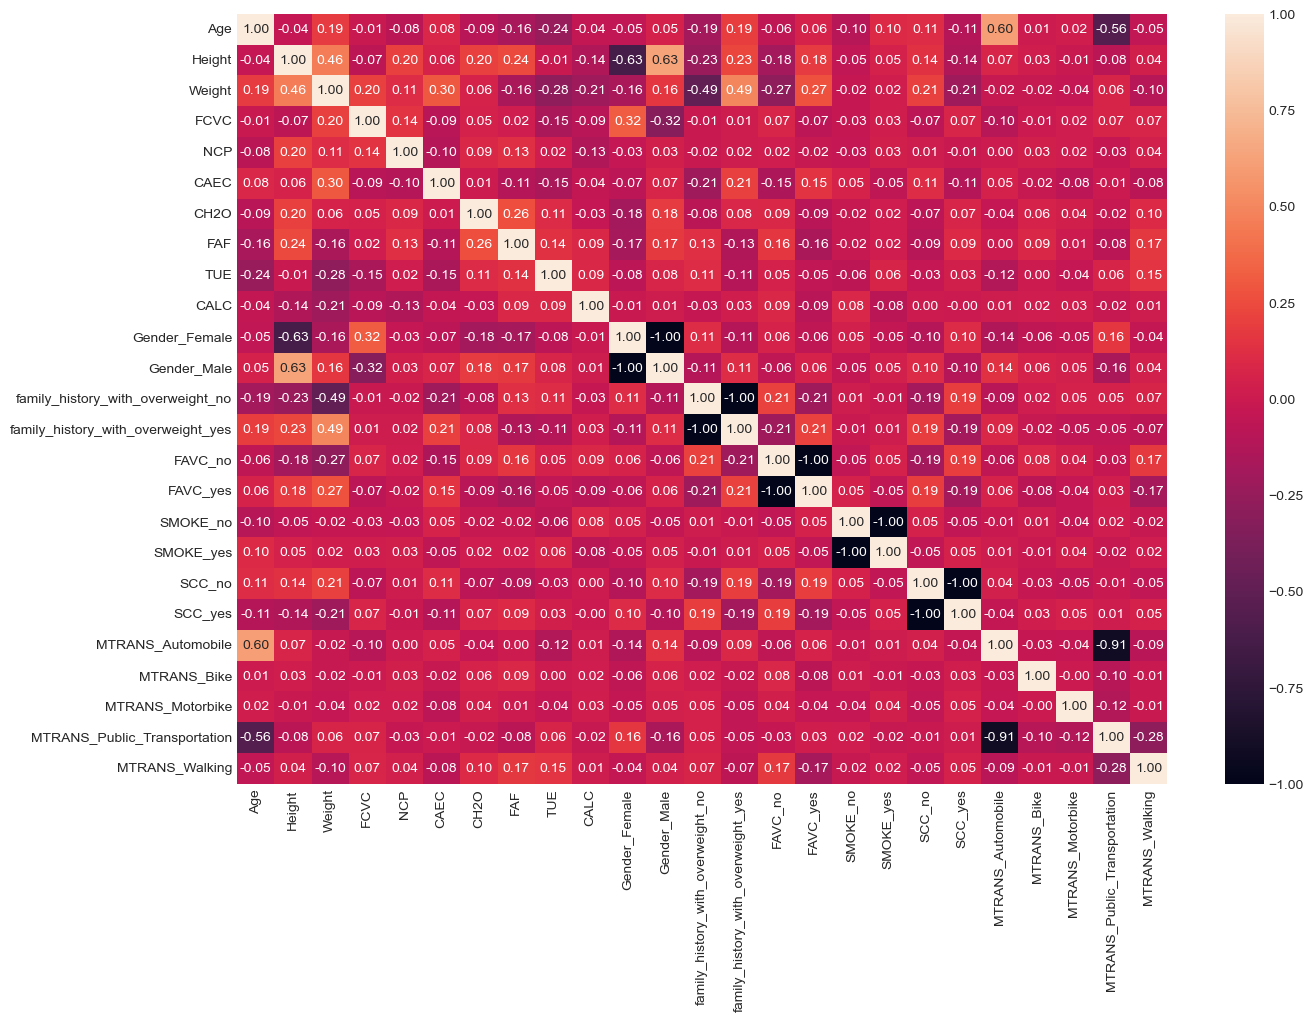

In [379]:
plt.figure(figsize=(15,10))

sns.heatmap(data.drop('NObeyesdad', axis = 1).corr(), annot = True, fmt='.2f')

plt.plot()

### Results

In [673]:
X = data.drop(class_feature, axis = 1)
y = data[class_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [674]:
ct = ColumnTransformer([("disc", KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), [0, 1, 2])]) # n_bins=[3, 2, 2]
X_train_discretisized, X_test_discretisized = X_train.copy(), X_test.copy()
X_train_discretisized[numerical_features] = ct.fit_transform(X_train)
X_test_discretisized[numerical_features] = ct.transform(X_test)

In [675]:
scaler = MinMaxScaler()
X_train_minmax_scaled = scaler.fit_transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

In [677]:
scaler = StandardScaler()
X_train_standard_scaled = scaler.fit_transform(X_train)
X_test_standard_scaled = scaler.transform(X_test)

In [427]:
knn = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier(random_state=42)
n_bayes = GaussianNB() 
rnd_forest = RandomForestClassifier(random_state=42)
gr_boosting = GradientBoostingClassifier(random_state=42) 
svm = SVC(probability=True, random_state=42)
log_regression = LogisticRegression(random_state=42) 

classifiers = [knn, dec_tree, n_bayes, rnd_forest, gr_boosting, svm, log_regression]

#### Cross validation

In [705]:
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)

In [434]:
titles = ["Cross validation for base dataset:", 
          "Cross validation for discretisized dataset:",
          "Cross validation for MinMaxScaled dataset:", 
          "Cross validation for StandardScaled dataset:"]

datasets = [X_train, X_train_discretisized, X_train_minmax_scaled, X_train_standard_scaled]

for title, train_data in zip(titles, datasets):
    columns = ["Classifier", "accuracy", "precision", "recall", "f1", "roc-auc"]
    df = pd.DataFrame(columns=columns)
    print(title)

    for classifier in classifiers:
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']
        scores = cross_validate(classifier, train_data, y_train, scoring=scoring, cv=5)
        
        accuracy = scores['test_accuracy'].mean()
        precision = scores['test_precision_macro'].mean()
        recall = scores['test_recall_macro'].mean()
        f1 = scores['test_f1_macro'].mean()
        roc_auc = scores['test_roc_auc_ovr'].mean()

        df.loc[len(df.index)] = [classifier.__class__.__name__, accuracy, precision, recall, f1, roc_auc]

    print(pdtabulate(df.round(2)))

Cross validation for base dataset:
+----------------------------+------------+-------------+----------+------+-----------+
| Classifier                 |   accuracy |   precision |   recall |   f1 |   roc-auc |
|----------------------------+------------+-------------+----------+------+-----------|
| KNeighborsClassifier       |       0.86 |        0.86 |     0.85 | 0.85 |      0.97 |
| DecisionTreeClassifier     |       0.93 |        0.93 |     0.93 | 0.93 |      0.96 |
| GaussianNB                 |       0.52 |        0.53 |     0.51 | 0.46 |      0.87 |
| RandomForestClassifier     |       0.94 |        0.94 |     0.93 | 0.93 |      0.99 |
| GradientBoostingClassifier |       0.95 |        0.95 |     0.95 | 0.95 |      1    |
| SVC                        |       0.55 |        0.56 |     0.56 | 0.55 |      0.92 |
| LogisticRegression         |       0.69 |        0.68 |     0.69 | 0.68 |      0.93 |
+----------------------------+------------+-------------+----------+------+----------

#### Hyperparameter tuning

In [491]:
classifiers_for_tuning = [knn, dec_tree, rnd_forest, gr_boosting]

for classifier in classifiers_for_tuning:
    print(f"\nParams for {classifier.__class__.__name__}:")
    params = pd.Series(classifier.get_params())
    params_df = pd.DataFrame({'param': params.index, 'value': params.values})
    params_df.fillna(value="None", inplace=True)
    
    print(pdtabulate(pd.DataFrame(params_df)))


Params for KNeighborsClassifier:
+---------------+-----------+
| param         | value     |
|---------------+-----------|
| algorithm     | auto      |
| leaf_size     | 30        |
| metric        | minkowski |
| metric_params | None      |
| n_jobs        | None      |
| n_neighbors   | 5         |
| p             | 2         |
| weights       | uniform   |
+---------------+-----------+

Params for DecisionTreeClassifier:
+--------------------------+---------+
| param                    | value   |
|--------------------------+---------|
| ccp_alpha                | 0.0     |
| class_weight             | None    |
| criterion                | gini    |
| max_depth                | None    |
| max_features             | None    |
| max_leaf_nodes           | None    |
| min_impurity_decrease    | 0.0     |
| min_samples_leaf         | 1       |
| min_samples_split        | 2       |
| min_weight_fraction_leaf | 0.0     |
| random_state             | 42      |
| splitter              

In [683]:
knn_grid_values = {'weights': ['uniform', 'distance'], 
                   'n_neighbors': list(range(5, 31)),
                   'metric': ['minkowski', 'cosine']}
dec_tree_grid_values = {'max_features': ['auto', 'sqrt', 'log2', None],
                        'ccp_alpha': [0.0, 0.1, .01, .001],
                        'max_depth' : [5, 7, 10, None],
                        'criterion' :['gini', 'entropy', 'log_loss'],
                        'class_weight': [None, 'balanced']}
rnd_forest_grid_values = {'class_weight': [None, 'balanced'], 
                          'n_estimators': [100, 150],
                          'max_features': ['sqrt', 'log2', None],
                          'criterion' :['gini', 'entropy', 'log_loss']}
gr_boosting_grid_values = {'max_depth':[3, 5, 8],
                           'max_features': ['sqrt', 'log2', None],
                           'criterion' :['friedman_mse', 'squared_error'],
                           'loss':['log_loss', 'exponential'],
                           'n_estimators': [100, 150]}

classifiers_dict = {knn: knn_grid_values,
                    dec_tree: dec_tree_grid_values, 
                    rnd_forest: rnd_forest_grid_values,
                    gr_boosting: gr_boosting_grid_values}

In [580]:
def gen_randomized_search_result(classifier, grid_val, X_train, y_train):
    grid_clf = RandomizedSearchCV(classifier, param_distributions=grid_val, scoring='accuracy', random_state=42, cv=5)
    grid_clf.fit(X_train, y_train)

    best_res = {"best_estimator": grid_clf.best_estimator_,
                "best_score":grid_clf.best_score_,
                "best_params": grid_clf.best_params_}
    
    return best_res

In [581]:
def gen_grid_search_result(classifier, grid_val, X_train, y_train):
    grid_clf = GridSearchCV(classifier, param_grid=grid_val, scoring='accuracy', cv=5)
    grid_clf.fit(X_train, y_train)

    best_res = {"best_estimator": grid_clf.best_estimator_,
                "best_score": grid_clf.best_score_,
                "best_params": grid_clf.best_params_}
    
    return best_res

In [686]:
randomized_search_result_dict = {}
for classifier, grid_val in classifiers_dict.items():
    randomized_search_result_dict[classifier] = gen_randomized_search_result(classifier, grid_val, X_train_standard_scaled, y_train)

In [584]:
grid_search_result_dict = {}
for classifier, grid_val in classifiers_dict.items():
    if classifier in [knn, dec_tree]: 
        grid_search_result_dict[classifier] = gen_grid_search_result(classifier, grid_val, X_train_standard_scaled, y_train)

In [678]:
grid_search_result_dict[rnd_forest] = gen_grid_search_result(rnd_forest, rnd_forest_grid_values, X_train_standard_scaled, y_train)

In [684]:
grid_search_result_dict[gr_boosting] = gen_grid_search_result(gr_boosting, gr_boosting_grid_values, X_train_standard_scaled, y_train)

In [575]:
def print_best_result(title, res_dict):
    print(title)

    columns = ["Classifier", "Best estimator", "Best score"]
    df = pd.DataFrame(columns=columns)

    for clf, res in res_dict.items():
        df.loc[len(df.index)] = [clf.__class__.__name__, res["best_estimator"], res["best_score"]]

    print(pdtabulate(df.round(2)))

In [687]:
print_best_result("\nRandomizedSearch result:\n", randomized_search_result_dict)
print_best_result("\nGridSearch result:\n", grid_search_result_dict)


RandomizedSearch result:

+----------------------------+----------------------------------------------------------------------------+--------------+
| Classifier                 | Best estimator                                                             |   Best score |
|----------------------------+----------------------------------------------------------------------------+--------------|
| KNeighborsClassifier       | KNeighborsClassifier(metric='cosine', weights='distance')                  |         0.81 |
| DecisionTreeClassifier     | DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',           |         0.92 |
|                            |                        criterion='log_loss', max_depth=7, random_state=42) |              |
| RandomForestClassifier     | RandomForestClassifier(criterion='log_loss', max_features=None,            |         0.96 |
|                            |                        n_estimators=150, random_state=42)                  |     

#### Testing

In [696]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [697]:
columns = ["Classifier", "Before tuning", "After RandomizedSearch", "After GridSearch"]
df = pd.DataFrame(columns=columns)

for clf in randomized_search_result_dict.keys():
    clf.fit(X_train_standard_scaled, y_train)
    before = test_model(clf, X_test_standard_scaled, y_test)
    after_randomized_search = test_model(randomized_search_result_dict[clf]["best_estimator"], X_test_standard_scaled, y_test)
    after_grid_search = test_model(grid_search_result_dict[clf]["best_estimator"], X_test_standard_scaled, y_test)

    df.loc[len(df.index)] = [clf.__class__.__name__, before, after_randomized_search, after_grid_search]

print(pdtabulate(df.round(3)))

+----------------------------+-----------------+--------------------------+--------------------+
| Classifier                 |   Before tuning |   After RandomizedSearch |   After GridSearch |
|----------------------------+-----------------+--------------------------+--------------------|
| KNeighborsClassifier       |           0.77  |                    0.833 |              0.837 |
| DecisionTreeClassifier     |           0.957 |                    0.955 |              0.962 |
| RandomForestClassifier     |           0.933 |                    0.988 |              0.988 |
| GradientBoostingClassifier |           0.974 |                    0.976 |              0.969 |
+----------------------------+-----------------+--------------------------+--------------------+


In [663]:
def show_conf_matrices(clf, y_test, y_pred, num_models, i):
    plt.subplot(1, num_models, i)
    plt.title(clf)
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

In [664]:
def show_metrics(clf, y_pred, y_proba, y_test):
    print("\n" + clf)

    area_under_roc = roc_auc_score(y_test, y_proba, multi_class="ovr", average=None)
    area_under_roc_macro = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
    area_under_roc_weithed = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")

    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report).transpose()
    accuracy_score = report_df.iloc[len(class_names)]["precision"]
    print('Accuracy score: {:.2f}'.format(accuracy_score))
    report_df.drop(report_df.index[len(class_names)], inplace=True)
    report_df.drop('support', axis=1, inplace=True)
    report_df["AUC-ROC"] = np.concatenate((area_under_roc, [area_under_roc_macro, area_under_roc_weithed]))

    pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql')
    print(pdtabulate(report_df.round(2)))

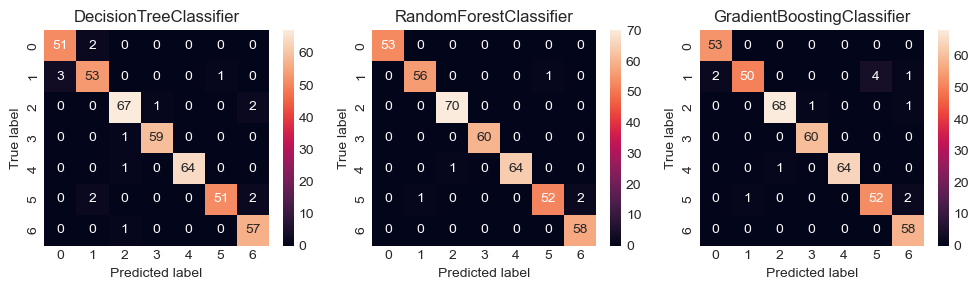

In [700]:
i = 1
plt.figure(figsize=(10, 3))
del grid_search_result_dict[knn]
num_models = len(grid_search_result_dict)

for clf, res in grid_search_result_dict.items():
    best_estm = res["best_estimator"]
    y_pred = best_estm.predict(X_test_standard_scaled)
    show_conf_matrices(clf.__class__.__name__, y_test, y_pred, num_models, i)
    i += 1

plt.tight_layout()

In [701]:
for clf, res in grid_search_result_dict.items():
    best_estm = res["best_estimator"]

    y_pred = best_estm.predict(X_test_standard_scaled)
    y_proba = best_estm.predict_proba(X_test_standard_scaled)

    show_metrics(clf.__class__.__name__, y_pred, y_proba, y_test)


DecisionTreeClassifier
Accuracy score: 0.96
+---------------------+-------------+----------+------------+-----------+
|                     |   precision |   recall |   f1-score |   AUC-ROC |
|---------------------+-------------+----------+------------+-----------|
| Insufficient_Weight |        0.94 |     0.96 |       0.95 |      0.98 |
| Normal_Weight       |        0.93 |     0.93 |       0.93 |      0.96 |
| Obesity_Type_I      |        0.96 |     0.96 |       0.96 |      0.97 |
| Obesity_Type_II     |        0.98 |     0.98 |       0.98 |      0.99 |
| Obesity_Type_III    |        1    |     0.98 |       0.99 |      0.99 |
| Overweight_Level_I  |        0.98 |     0.93 |       0.95 |      0.96 |
| Overweight_Level_II |        0.93 |     0.98 |       0.96 |      0.99 |
| macro avg           |        0.96 |     0.96 |       0.96 |      0.98 |
| weighted avg        |        0.96 |     0.96 |       0.96 |      0.98 |
+---------------------+-------------+----------+------------+------